# Import need libraries and data

In [2]:
# Import Package like array to help to array the data
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier as MLP
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [3]:
# import trainig, validation and test set from previous data set
X_train_df = pd.read_csv('data/X_train.csv',header=None,skiprows=1,index_col=0)
x_test_df = pd.read_csv('data/x_test.csv',header=None,skiprows=1,index_col=0)

y_train_df = pd.read_csv('data/y_train.csv',header=None,skiprows=1,index_col=0)
y_test_df = pd.read_csv('data/y_test.csv',header=None, skiprows=1,index_col=0)


# conversions from data frames to lists
X_train = (X_train_df.values).tolist()
x_test = (x_test_df.values).tolist()

y_train = sum(((y_train_df.values).tolist()),[])
y_test = sum(((y_test_df.values).tolist()),[])

# Process data

In neural network algorithms,the performance of a model depends on the distance of feature values.
Therefore, the difference of range in features should be reduced. 
So now we use two different ways(normalization and min-max scaling) to help deal with the data.

In [5]:
# normalization the data in neural network
mu = np.mean(X_train, axis=0)
sigma = np.std(X_train, axis=0)

X_train_no = (X_train - mu)/sigma
x_test_no = (x_test - mu)/sigma

In [6]:
# rescale the data with the min and max values
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_mm = scaler.transform(X_train)
scaler.fit(x_test)
x_test_mm = scaler.transform(x_test)

# Learning Curve

Step 1
Here we choose the model to find suitable values for hidden layer sizes. And from the figure below we can know the
accuracy of model when choosing min-max scaling should be greater than normalization. Therefore, this model will
use the normalization to process data. 
In addition, this model shows greatest accuracy when hidden layer sizes are nearly about 15. 

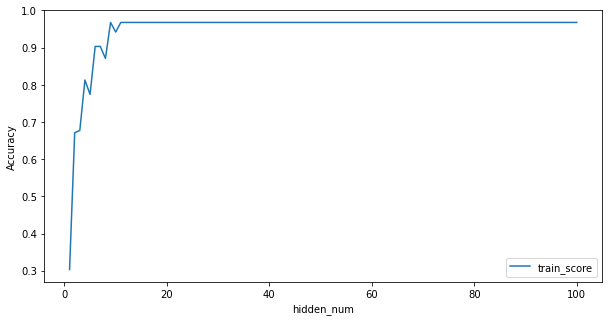

In [23]:
hidden_lst_up = []
train_score_up = []

for hidden in range(1,101):
    mlp = MLP(solver='lbfgs', random_state=1, hidden_layer_sizes= [hidden] , max_iter=5000)
    mlp.fit(X_train_mm, y_train)
    hidden_lst_up.append(hidden)
    train_score_up.append(mlp.score(X_train_mm, y_train))
plt.figure(figsize=(10, 5))
plt.plot(hidden_lst_up, train_score_up,label="train_score")

plt.ylabel("Accuracy")
plt.xlabel("hidden_num")
plt.legend() 

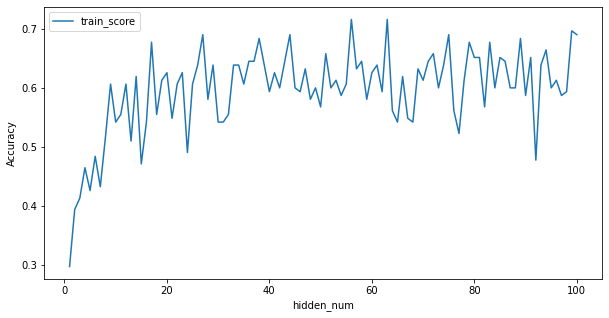

In [24]:
hidden_lst_up = []
train_score_up = []

for hidden in range(1,101):
    mlp = MLP(solver='lbfgs', random_state=1, hidden_layer_sizes= [hidden] , max_iter=5000)
    mlp.fit(X_train_mm, y_train)
    hidden_lst_up.append(hidden)
    train_score_up.append(mlp.score(X_train_no, y_train))
plt.figure(figsize=(10, 5))
plt.plot(hidden_lst_up, train_score_up,label="train_score")

plt.ylabel("Accuracy")
plt.xlabel("hidden_num")
plt.legend() 

Step 2
Here we decide to apply GridSearchCV ways to help to find other hyperparameters to better fit this model.
The GridSearchCV can provdide best-found hyperparameters and the associated mean cross-validated score.
This results shows that the best hyperparameters is shown below.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [{
    'max_iter': [5000],
    'hidden_layer_sizes':[(15,15)],
    'activation':['tanh', 'relu','logistic'],
    'alpha': [0.00001,0.0001,0.001],
    'solver':['lbfgs'],
#     'learning_rate':['constant', 'invscaling', 'adaptive'],
    'random_state':[0,1,2,3],
   
    }]


grid_search = GridSearchCV(mlp, param_grid, cv=3, verbose=3)
grid_search.fit(X_train_mm, y_train)

In [ ]:
grid_search.best_estimator_

In [8]:
mlp = MLP(activation='logistic', alpha=0.001, hidden_layer_sizes=(15, 15),
              max_iter=5000, random_state=1, solver='lbfgs')
mlp.fit(X_train_mm,y_train)

MLPClassifier(activation='logistic', alpha=0.001, hidden_layer_sizes=(15, 15),
              max_iter=5000, random_state=1, solver='lbfgs')

# Predict Data

This model has beed created and hyparamaters has been modified using approaches above.

In [11]:
predictions = mlp.predict(x_test_mm)

from sklearn.metrics import classification_report,confusion_matrix
cm = confusion_matrix(predictions,y_test)
cm
print(classification_report(y_test,predictions))

array([[0, 0, 1, 3, 1, 1],
       [2, 1, 1, 1, 0, 0],
       [3, 0, 2, 0, 0, 0],
       [0, 0, 1, 2, 2, 0],
       [1, 1, 1, 4, 5, 2],
       [2, 0, 0, 0, 0, 2]])

# Evaluation of the predicted outcome

Evaluating classifiеr and model fitting by plotting confusion matrix. Each row of the matrix represents the instances in a predicted class, while each column represents the instances in an actual class.

Text(56.760000000000005, 0.5, 'Predicted label')

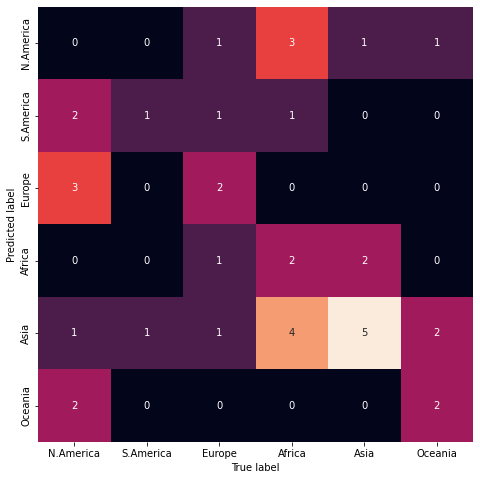

In [27]:
# Defining plotting parameters and plotting confusion matrix 
import seaborn as sns
matrix = confusion_matrix(y_test, predictions)

fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=False, ax=ax)
ax.yaxis.set_ticklabels(['N.America','S.America','Europe','Africa','Asia','Oceania'])
ax.xaxis.set_ticklabels(['N.America','S.America','Europe','Africa','Asia','Oceania'])
plt.xlabel('True label')
plt.ylabel('Predicted label')

In [ ]:
import joblib
joblib.dump(mlp, 'saved_model/neural.pkl')